In [1]:
#Organising Data inside folder
import os
import shutil

#Data located in folder on Computer outside current working directory since github cannot handle large amounts of data
os.chdir("..")

path = os.getcwd()
print(path)
tars = os.listdir(path + '/labelled_images/')
new_path = path + '/Data/'
os.mkdir(new_path)
for tar in tars:
  path_to_file = path + '/labelled_images/' + tar
  shutil.unpack_archive(path_to_file, new_path+'/')


c:\Users\Divya\Desktop\Kvasir-Capsule-ML-Project


In [2]:
path = new_path
classes = os.listdir(path)
classes.sort()
print(classes)

['Ampulla of vater', 'Angiectasia', 'Blood - fresh', 'Blood - hematin', 'Erosion', 'Erythema', 'Foreign body', 'Ileocecal valve', 'Lymphangiectasia', 'Normal clean mucosa', 'Polyp', 'Pylorus', 'Reduced mucosal view', 'Ulcer']


In [3]:
import matplotlib.pyplot as plt

def visualise_class_distribution():
  class_paths = [os.path.join(path, d) for d in os.listdir(path) if os.path.isdir(os.path.join(path, d))]
  # Count the number of images in each subdirectory
  counts = [0] * len(class_paths)
  for i, directory in enumerate(class_paths):
      counts[i] = len(os.listdir(directory))
  print(counts)
  # Create a bar chart to visualize the distribution
  plt.bar(classes, counts)
  plt.xticks(rotation=90)
  plt.ylabel("Class Imbalance")
  plt.show()
  return counts

[10, 866, 446, 12, 506, 159, 776, 4189, 592, 34338, 55, 1529, 2906, 854]


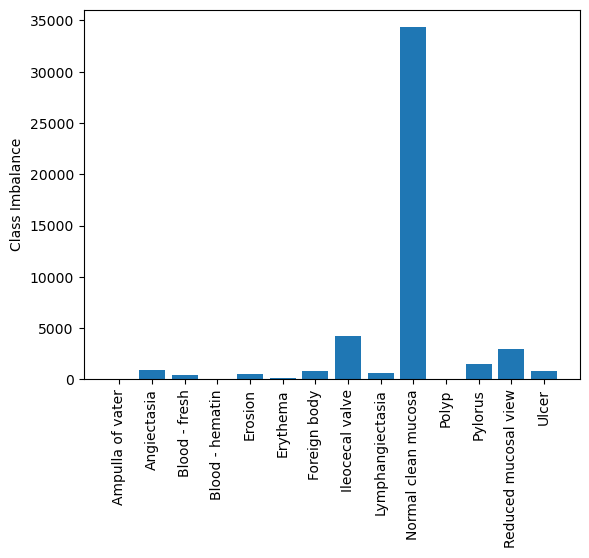

In [4]:
#Before Augmentation 
counts = visualise_class_distribution()

In [5]:
#We are gonna be dropping the largest clean mucosa data for now due to lack of computational resources
classes.remove('Normal clean mucosa')
counts.pop(counts.index(max(counts)))
#print(classes)
#print(counts)

34338

In [6]:
#Data Augmentation 
import Augmentor 
import random 

new_path = os.getcwd() + '/AugmentedData/'
os.mkdir(new_path)

#Augmenting All data points upto the average number of data points
N = int(sum(counts) / len(counts))
for n, cl in zip(counts, classes):
  if n > N:
    shutil.move(path+cl, new_path+cl)
  else:
    p = Augmentor.Pipeline(path + cl)
    #Skewing the Data
    p.skew(probability = 0.3)
    #Elastic Distortion
    p.random_distortion(probability=0.3, grid_width=15, grid_height=15, magnitude=10)
    #Shearing
    p.shear(probability=0.3, max_shear_left=15, max_shear_right=15)
    #No of Total imagesAugmented Images
    p.sample(N)
    shutil.move(path+cl+'/output', new_path+cl)

Initialised with 10 image(s) found.
Output directory set to c:\Users\Divya\Desktop\Kvasir-Capsule-ML-Project/Data/Ampulla of vater\output.

Executing Pipeline:   0%|          | 0/992 [00:00<?, ? Samples/s]

Processing <PIL.Image.Image image mode=RGB size=336x336 at 0x21891E2E780>: 100%|██████████| 992/992 [00:01<00:00, 498.65 Samples/s]                   


Initialised with 866 image(s) found.
Output directory set to c:\Users\Divya\Desktop\Kvasir-Capsule-ML-Project/Data/Angiectasia\output.

Processing <PIL.Image.Image image mode=RGB size=336x336 at 0x2188E455FA0>: 100%|██████████| 992/992 [00:02<00:00, 493.94 Samples/s]                   


Initialised with 446 image(s) found.
Output directory set to c:\Users\Divya\Desktop\Kvasir-Capsule-ML-Project/Data/Blood - fresh\output.

Processing <PIL.Image.Image image mode=RGB size=336x336 at 0x21891E09AF0>: 100%|██████████| 992/992 [00:02<00:00, 494.64 Samples/s]                  


Initialised with 12 image(s) found.
Output directory set to c:\Users\Divya\Desktop\Kvasir-Capsule-ML-Project/Data/Blood - hematin\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=336x336 at 0x21891E62EA0>: 100%|██████████| 992/992 [00:02<00:00, 469.14 Samples/s]


Initialised with 506 image(s) found.
Output directory set to c:\Users\Divya\Desktop\Kvasir-Capsule-ML-Project/Data/Erosion\output.

Processing <PIL.Image.Image image mode=RGB size=336x336 at 0x21891DFA630>: 100%|██████████| 992/992 [00:02<00:00, 468.39 Samples/s]                  


Initialised with 159 image(s) found.
Output directory set to c:\Users\Divya\Desktop\Kvasir-Capsule-ML-Project/Data/Erythema\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=336x336 at 0x21891D53EF0>: 100%|██████████| 992/992 [00:02<00:00, 454.68 Samples/s]


Initialised with 776 image(s) found.
Output directory set to c:\Users\Divya\Desktop\Kvasir-Capsule-ML-Project/Data/Foreign body\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=336x336 at 0x2188F346BA0>: 100%|██████████| 992/992 [00:01<00:00, 500.65 Samples/s]


Initialised with 592 image(s) found.
Output directory set to c:\Users\Divya\Desktop\Kvasir-Capsule-ML-Project/Data/Lymphangiectasia\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=336x336 at 0x21891DEF950>: 100%|██████████| 992/992 [00:02<00:00, 482.88 Samples/s]


Initialised with 55 image(s) found.
Output directory set to c:\Users\Divya\Desktop\Kvasir-Capsule-ML-Project/Data/Polyp\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=336x336 at 0x21891E60380>: 100%|██████████| 992/992 [00:01<00:00, 499.01 Samples/s]


Initialised with 854 image(s) found.
Output directory set to c:\Users\Divya\Desktop\Kvasir-Capsule-ML-Project/Data/Ulcer\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=336x336 at 0x21891D94530>: 100%|██████████| 992/992 [00:02<00:00, 491.17 Samples/s]


In [7]:
#Manually Randomly Sampling Dataset to keep it to scale
N = max(counts)
#Matching it to the largest class in Augmented Dataset
cls_ = '/Normal clean mucosa/'
os.mkdir(new_path+cls_)
file_list = os.listdir(path+cls_)
for i in range(N):
  f = random.choice(file_list)
  file_list.remove(f)
  shutil.copy(path+cls_+f, new_path+cls_)


[992, 992, 992, 992, 992, 992, 992, 4189, 992, 4189, 992, 1529, 2906, 992]


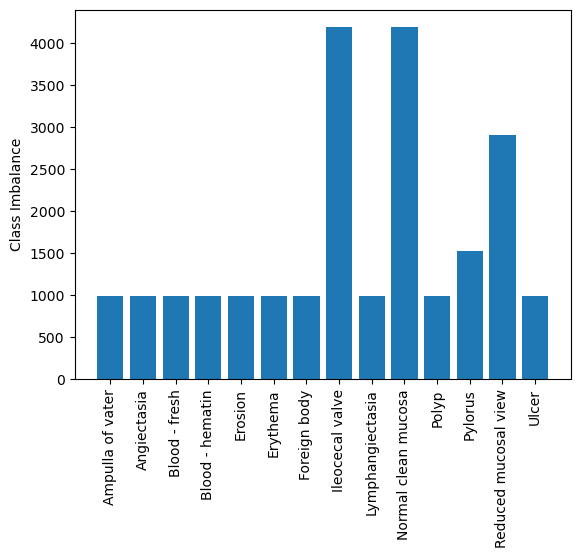

In [8]:
#Results After Augmentation
path = new_path
classes = os.listdir(new_path)
classes.sort()
count = visualise_class_distribution()

In [9]:
#Clearning up unecessary files
shutil.rmtree(os.getcwd() + "/Data")

In [10]:
#Add code to randomly plot Images from the data folders